### Виконав: Овчар Антон, КА-64
# Лабораторна робота №9
## Диференційні рівняння у частинних похідних
#### 1. Умова:
Розв'язати рівняння параболічного типу

$\frac{\partial u}{\partial t} = a\frac{\partial^2 u}{\partial x^2} - qu, \quad u=u(t,x), \quad 0<x<L$

з початковою умовою
$u(0,x) = u_0(x)$

та крайовими умовами 
$u(t,0)=u(t,L)=0$

Якщо за початкову умову взяти функцію 
$u_0(t,x)=A\sin(\frac{\pi x}{L})$,

то рівняння матиме аналітичний розв'язок
$u_0(t,x)=Ae^{-\alpha t}\sin(\frac{\pi x}{L})$,

де $\alpha$ визначається параметрами початкової умови.

Параметри $a=0.7 \\ q=1.5 \\ L=1.4$

#### 2. Аналітичний розв'язок
Розвязком задачі є функція 
$u_0(t,x)=Ae^{-\alpha t}\sin(\frac{\pi x}{L})$

Для того, щоб порахувати параметр $\alpha$, необхідно підставити її у початкове диференціальне рівняння:

$-\alpha e^{-\alpha t}\sin(\frac{\pi x}{L}) = -a\frac{\pi^2}{L^2}e^{-\alpha t}\sin(\frac{\pi x}{L}) - qe^{-\alpha t}\sin(\frac{\pi x}{L}) \quad \Rightarrow \quad \alpha = a\frac{\pi^2}{L^2} + q$

#### 3. Чисельний розв'язок

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 7.5) # set default size of plots

##### Умова

In [2]:
a = 0.7
q = 1.5
L = 1.4
x0 = 0
xn = L
t0 = 0
tm = 2
n = 10
m = 1000

##### Функція розв'язку

In [3]:
def u(x, t, a, q, L, A=1):
    alpha = a * np.pi**2 / L**2 + q
    return A * np.exp(-alpha*t) * np.sin(np.pi * x / L)

##### Метод прогонки

In [4]:
def solve(matr_copy, vect_copy):
    matr = np.copy(matr_copy)
    vect = np.copy(vect_copy)
    n = matr.shape[0]
    a = [matr[i+1][i] for i in range(n-1)]
    a.insert(0, 0)
    b = [matr[i][i+1] for i in range(n-1)]
    b.append(0)
    c = [matr[i][i] for i in range(n)]
    f = vect
    
    x = [0 for i in range(n)]
    for i in range(1, n):
        m = a[i] / c[i-1]
        c[i] = c[i] - m * b[i-1]
        f[i] = f[i] - m * f[i-1]
    x[n-1] = f[n-1]/c[n-1]
    for i in range(n-2, -1, -1):
        x[i] = (f[i] - b[i] * x[i+1]) / c[i]
        
    return x

##### Метод Кранка-Ніколсона

In [5]:
def krank_nikolson(x0, xn, n, t0, tm, m, a, q, L):
    dx = (xn - x0) / n
    dt = (tm - t0) / m
    x = np.array([x0+i*dx for i in range(n+1)])
    t = np.array([t0+i*dt for i in range(m+1)])
    
    result = np.zeros((m+1, n+1))
    
    for i in range(m + 1):
        if i == 0:
            for j in range(n+1):
                if j == 0:
                    result[i][j] = 0
                elif j == n:
                    result[i][j] = 0
                else:
                    result[i][j] = u(x[j], 0, a, q, L)
        else:
            matr = np.zeros((n+1, n+1))
            vect = np.zeros(n+1)
            for j in range(n+1):
                if j == 0:
                    matr[j][j] = 1
                elif j == n:
                    matr[j][j] = 1
                else:
                    matr[j][j-1] = a / 2 / dx**2
                    matr[j][j] = -a/dx**2 - q/2 - 1/dt
                    matr[j][j+1] = a / 2 / dx**2
                    vect[j] = -(result[i-1][j-1]*a/2/dx**2 + result[i-1][j]*(-a/dx**2 - q/2 + 1/dt) + result[i-1][j+1]*a/2/dx**2)
            
            ans = solve(matr, vect)
            for j in range(n+1):
                result[i][j] = ans[j]
                
    return result

##### Результати роботи програми

In [6]:
res = krank_nikolson(x0, xn, n, t0, tm, m, a, q, L)

table = pd.concat({
    t0+i*(tm-t0)/m: pd.DataFrame({
        'X': [x0+j*(xn-x0)/n for j in range(n+1)],
        'Y (Kr-Ni)': res[i],
        'Y (Actual)': [u(x0+j*(xn-x0)/n, t0+i*(tm-t0)/m, a, q, L) for j in range(n+1)],
        'Error': np.fabs(res[i] - np.array([u(x0+j*(xn-x0)/n, t0+i*(tm-t0)/m, a, q, L) for j in range(n+1)]))
    }) for i in range(m+1)
}, names=['Time'])
display(table)

X  Y (Kr-Ni)    Y (Actual)         Error
Time                                                 
0.000 0   0.00   0.000000  0.000000e+00  0.000000e+00
      1   0.14   0.309017  3.090170e-01  0.000000e+00
      2   0.28   0.587785  5.877853e-01  0.000000e+00
      3   0.42   0.809017  8.090170e-01  0.000000e+00
      4   0.56   0.951057  9.510565e-01  0.000000e+00
      5   0.70   1.000000  1.000000e+00  0.000000e+00
      6   0.84   0.951057  9.510565e-01  0.000000e+00
      7   0.98   0.809017  8.090170e-01  0.000000e+00
      8   1.12   0.587785  5.877853e-01  0.000000e+00
      9   1.26   0.309017  3.090170e-01  4.440892e-16
      10  1.40   0.000000  1.224647e-16  1.224647e-16
0.002 0   0.00   0.000000  0.000000e+00  0.000000e+00
      1   0.14   0.305945  3.059270e-01  1.765496e-05
      2   0.28   0.581941  5.819078e-01  3.358173e-05
      3   0.42   0.800974  8.009273e-01  4.622129e-05
      4   0.56   0.941601  9.415465e-01  5.433638e-05
      5   0.70   0.990058  9.900006e-01  5.713266e-05
      6   0.84   0.941601  9.415465e-01  5.433638e-05
      7   0.98   0.800974  8.009273e-01  4.622129e-05
      8   1.12   0.581941  5.819078e-01  3.358173e-05
      9   1.26   0.305945  3.059270e-01  1.765496e-05
      10  1.40   0.000000  1.212401e-16  1.212401e-16
0.004 0   0.00   0.000000  0.000000e+00  0.000000e+00
      1   0.14   0.302903  3.028679e-01  3.495785e-05
      2   0.28   0.576156  5.760890e-01  6.649379e-05
      3   0.42   0.793010  7.929185e-01  9.152085e-05
      4   0.56   0.932239  9.321316e-01  1.075892e-04
      5   0.70   0.980214  9.801012e-01  1.131260e-04
      6   0.84   0.932239  9.321316e-01  1.075892e-04
      7   0.98   0.793010  7.929185e-01  9.152085e-05
...        ...        ...           ...           ...
1.996 3   0.42   0.000038  3.565742e-05  2.113893e-06
      4   0.56   0.000044  4.191781e-05  2.485030e-06
      5   0.70   0.000047  4.407499e-05  2.612915e-06
      6   0.84   0.000044  4.191781e-05  2.485030e-06
      7   0.98   0.000038  3.565742e-05  2.113893e-06
      8   1.12   0.000027  2.590663e-05  1.535833e-06
      9   1.26   0.000014  1.361992e-05  8.074352e-07
      10  1.40   0.000000  5.397630e-21  5.397630e-21
1.998 0   0.00   0.000000  0.000000e+00  0.000000e+00
      1   0.14   0.000014  1.348373e-05  8.001856e-07
      2   0.28   0.000027  2.564758e-05  1.522043e-06
      3   0.42   0.000037  3.530087e-05  2.094913e-06
      4   0.56   0.000044  4.149866e-05  2.462718e-06
      5   0.70   0.000046  4.363427e-05  2.589455e-06
      6   0.84   0.000044  4.149866e-05  2.462718e-06
      7   0.98   0.000037  3.530087e-05  2.094913e-06
      8   1.12   0.000027  2.564758e-05  1.522043e-06
      9   1.26   0.000014  1.348373e-05  8.001856e-07
      10  1.40   0.000000  5.343657e-21  5.343657e-21
2.000 0   0.00   0.000000  0.000000e+00  0.000000e+00
      1   0.14   0.000014  1.334890e-05  7.930003e-07
      2   0.28   0.000027  2.539112e-05  1.508376e-06
      3   0.42   0.000037  3.494788e-05  2.076102e-06
      4   0.56   0.000044  4.108370e-05  2.440604e-06
      5   0.70   0.000046  4.319795e-05  2.566203e-06
      6   0.84   0.000044  4.108370e-05  2.440604e-06
      7   0.98   0.000037  3.494788e-05  2.076102e-06
      8   1.12   0.000027  2.539112e-05  1.508376e-06
      9   1.26   0.000014  1.334890e-05  7.930003e-07
      10  1.40   0.000000  5.290224e-21  5.290224e-21

[11011 rows x 4 columns]

##### Графік залежності помилки від часу

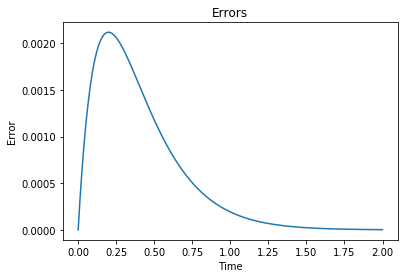

In [7]:
x = [t0+i*(tm-t0)/m for i in range(m+1)]
y = [np.max(np.fabs(res[i] - np.array([u(x0+j*(xn-x0)/n, t0+i*(tm-t0)/m, a, q, L) for j in range(n+1)]))) for i in range(m+1)]
plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel('Error')
plt.title('Errors')
plt.show()

#### Графік залежності помилки від часу с кроком дискретизації в 2 рази меншне

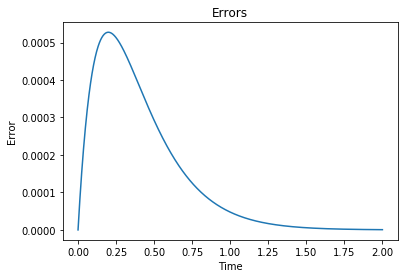

In [8]:
n *= 2
res = krank_nikolson(x0, xn, n, t0, tm, m, a, q, L)
x = [t0+i*(tm-t0)/m for i in range(m+1)]
y = [np.max(np.fabs(res[i] - np.array([u(x0+j*(xn-x0)/n, t0+i*(tm-t0)/m, a, q, L) for j in range(n+1)]))) for i in range(m+1)]
plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel('Error')
plt.title('Errors')
plt.show()

#### 4. Висновок
Останні два графіки підтверджують факт того, що при зменшенні кроку дискретизації в 2 рази, похибка зменшиться у 4 рази.